In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)




In [2]:
df= pd.read_csv("rideshare_kaggle.csv")

In [3]:
df.head()



,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

## Analysis For Each Hour

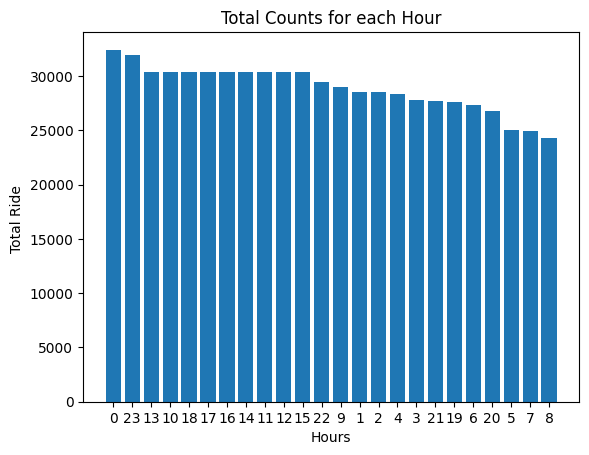

In [5]:
a= df.groupby("hour").size()

a= a.sort_values(ascending=False)


plt.bar(range(len(a)),a.values)
plt.xticks(range(len(a)),a.index)

plt.title("Total Counts for each Hour")

plt.xlabel("Hours")
plt.ylabel("Total Ride ")

plt.show()


# Column Analysis

In [6]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [8]:
df=df.drop("id",axis=1)



In [9]:
df=df.dropna(subset=("price"))

In [10]:
from sklearn.preprocessing import LabelEncoder

# Create a copy to avoid changing the original dataframe
df_encoded = df.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in df_encoded.select_dtypes(include=["object", "category"]).columns:
    # The fit_transform method expects non-null data
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# df_encoded now has all categorical columns label encoded


In [11]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   timestamp                    637976 non-null  float64
 1   hour                         637976 non-null  int64  
 2   day                          637976 non-null  int64  
 3   month                        637976 non-null  int64  
 4   datetime                     637976 non-null  int64  
 5   timezone                     637976 non-null  int64  
 6   source                       637976 non-null  int64  
 7   destination                  637976 non-null  int64  
 8   cab_type                     637976 non-null  int64  
 9   product_id                   637976 non-null  int64  
 10  name                         637976 non-null  int64  
 11  price                        637976 non-null  float64
 12  distance                     637976 non-null  float64
 13 

In [12]:
X=df_encoded.drop("price",axis=1).values
y=df_encoded["price"].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
# scaler = MinMaxScaler()

# Apply the scaler to the DataFrame
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

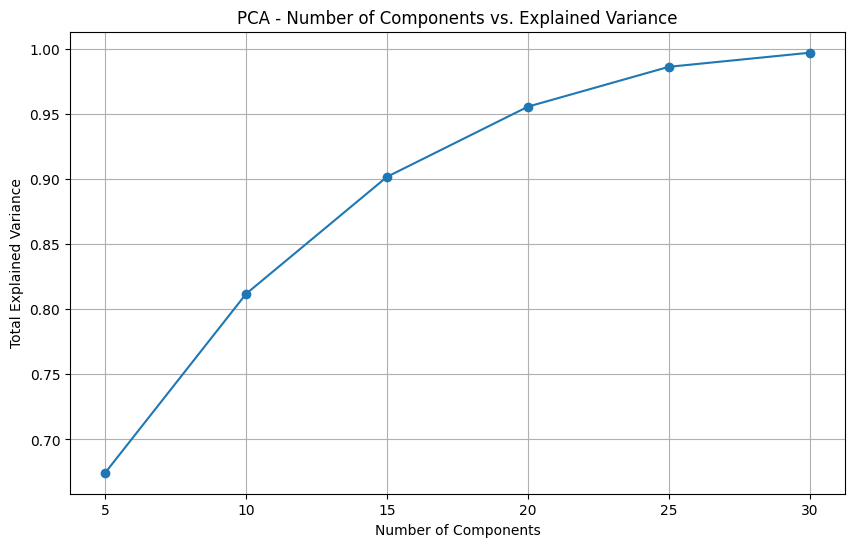

best component 30


In [13]:
from sklearn.decomposition import PCA
import numpy as np


n_components_list = [5, 10, 15, 20, 25, 30]


explained_var_ratios = {}


for n_components in n_components_list:
    pca = PCA(n_components=n_components)
    pca.fit(X_train_scaled)
    explained_var_ratios[n_components] = np.sum(pca.explained_variance_ratio_)


plt.figure(figsize=(10,6))
plt.plot(list(explained_var_ratios.keys()), list(explained_var_ratios.values()), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance')
plt.title('PCA - Number of Components vs. Explained Variance')
plt.grid(True)
plt.show()

# Açıklanan varyans oranlarına göre en iyi bileşen sayısını seçin
best_n_components = max(explained_var_ratios, key=explained_var_ratios.get)
print("best component", best_n_components)

### 20 COMPONENTS HOLDS THE %95 VARIANCE


In [14]:
pca = PCA(n_components=20)  # %95 varyansı korumak için
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [15]:
print(X_train_pca.shape)
print(y_train.shape)

print(type(X_train_pca))
print(type(y_train))

(510380, 20)
(510380,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## XgBoost

In [16]:

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error




xgb_model = xgb.XGBRegressor(random_state=21)

# Define parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.5, 0.75, 1.0],
    'colsample_bytree': [0.5, 0.75, 1.0],
}

# Initialize GridSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=10, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Perform GridSearchCV
random_search.fit(X_train_pca, y_train)

# Get best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (neg_mean_squared_error):", best_score)

# Evaluate on test set using best model
best_model = random_search.best_estimator_
y_pred_xgb = best_model.predict(X_test_pca)
test_mse = mean_squared_error(y_test, y_pred_xgb,squared=False)
print("Test RMSE:", test_mse)

from sklearn.metrics import r2_score

# Evaluate model
print("Evaluating model performance.")
xgb_score = r2_score(y_test, y_pred_xgb)
print(f'R^2 score: {xgb_score}')

Best Parameters: {'subsample': 0.75, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best Score (neg_mean_squared_error): -4.728041983862499
Test RMSE: 2.1160823433501275
Evaluating model performance.
R^2 score: 0.9486374996772938


In [22]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

# Assuming you have X_train, X_test, y_train, y_test prepared

# Polynomial feature transformation
degree = 2  # Specify the degree of polynomial features
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train_pca)
X_test_poly = poly.transform(X_test_pca)

# Initialize Linear Regression model
linear_model = LinearRegression()

# Define parameter grid for GridSearchCV
param_grid = {
    'normalize': [True, False]  # Whether to normalize the features or not
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=linear_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Perform GridSearchCV
grid_search.fit(X_train_poly, y_train)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (neg_mean_squared_error):", best_score)

# Evaluate on test set using best model
best_model = grid_search.best_estimator_
y_pred_poly = best_model.predict(X_test_poly)

# Calculate RMSE
test_rmse = mean_squared_error(y_test, y_pred_poly, squared=False)
print("Test RMSE:", test_rmse)


from sklearn.metrics import r2_score

# Evaluate model
print("Evaluating model performance.")
pl_score = r2_score(y_test, y_pred_poly)
print(f'R^2 score: {pl_score}')

Best Parameters: {'normalize': True}
Best Score (neg_mean_squared_error): -40.19773524827636
Test RMSE: 6.314550111280921
Evaluating model performance.
R^2 score: 0.5426319129971563


In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Define parameter distributions for RandomizedSearchCV
param_distributions = {
    'decisiontreeregressor__max_depth': [3, 5, 7, 10],
    'decisiontreeregressor__min_samples_split': [2, 5, 10],
    'decisiontreeregressor__min_samples_leaf': [1, 2, 4]
}

# Create a pipeline with polynomial features and decision tree regressor
pipeline = make_pipeline(PolynomialFeatures(), DecisionTreeRegressor(random_state=10))

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_distributions, cv=3, scoring='neg_mean_squared_error', n_iter=10, random_state=10)

# Perform RandomizedSearchCV
random_search.fit(X_train_pca, y_train)

# Get best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (neg_mean_squared_error):", best_score)

# Evaluate on test set using best model
y_pred_dt = random_search.predict(X_test_pca)

# Calculate RMSE
test_rmse = mean_squared_error(y_test, y_pred_dt, squared=False)
print("Test RMSE:", test_rmse)

# Evaluate model
dt_score = r2_score(y_test, y_pred_dt)
print(f'R^2 score: {dt_score}')


Best Parameters: {'decisiontreeregressor__min_samples_split': 10, 'decisiontreeregressor__min_samples_leaf': 2, 'decisiontreeregressor__max_depth': 10}
Best Score (neg_mean_squared_error): -9.518796573431738
Test RMSE: 2.9875114109064524
R^2 score: 0.8976235241319918


In [23]:
print("XGBoostRegressor :",xgb_score)
print("Polynomial Regression :",pl_score)
print("DecisionTreeRegressor :",dt_score)

XGBoostRegressor : 0.9486374996772938
Polynomial Regression : 0.5426319129971563
DecisionTreeRegressor : 0.8976235241319918
